/tmp/ipython-input-2351421343.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


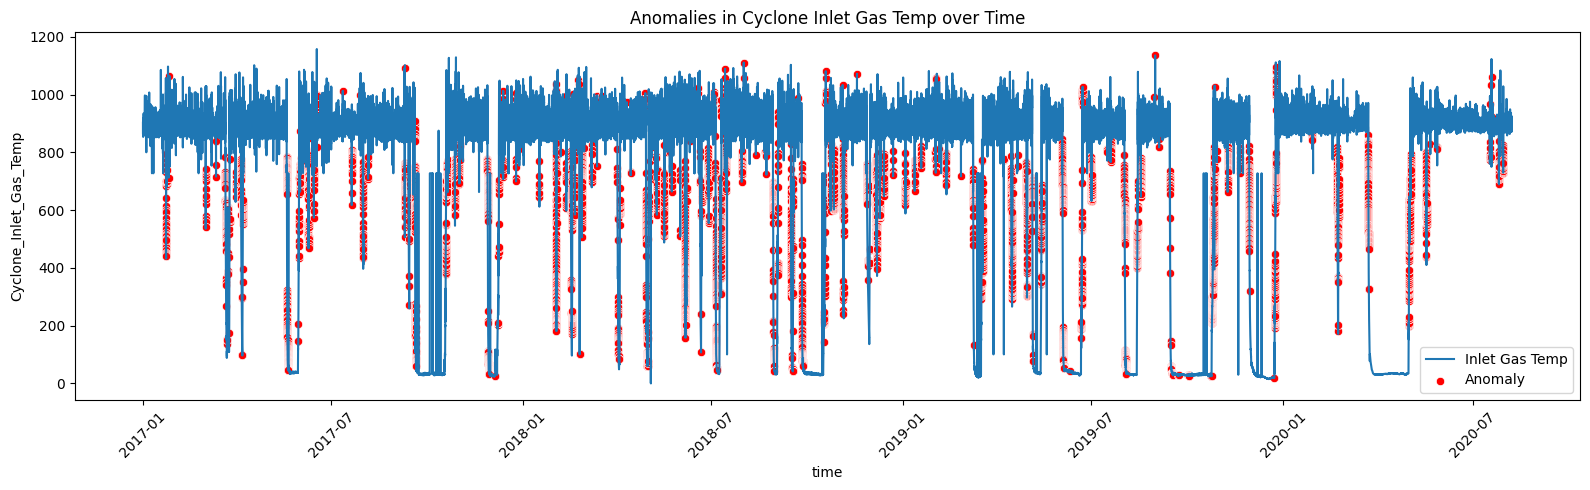

Detected abnormal time periods:
                    time  Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
6360 2017-01-23 02:00:00                  794.26                 734.59   
6363 2017-01-23 02:15:00                  769.63                 691.05   
6364 2017-01-23 02:20:00                  769.14                 686.87   
6368 2017-01-23 02:40:00                  686.80                 519.25   
6369 2017-01-23 02:45:00                  643.16                 490.98   
6370 2017-01-23 02:50:00                  613.86                 470.67   
6371 2017-01-23 02:55:00                  593.11                 440.77   
6372 2017-01-23 03:00:00                  598.86                 459.13   
6373 2017-01-23 03:05:00                  592.82                 463.82   
6374 2017-01-23 03:10:00                  571.57                 424.36   

      Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  Cyclone_Gas_Outlet_Temp  \
6360                     -0.14              -19.56             

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Step 1: Load data
df = pd.read_csv('/content/data (5) (1) (1) (1) (1)(internship-data-1).csv')

# Step 2: Parse time column
df['time'] = pd.to_datetime(df['time'])
df.sort_values('time', inplace=True)

# Step 3: Select features for anomaly detection
features = [
    'Cyclone_Inlet_Gas_Temp',
    'Cyclone_Material_Temp',
    'Cyclone_Outlet_Gas_draft',
    'Cyclone_cone_draft',
    'Cyclone_Gas_Outlet_Temp',
    'Cyclone_Inlet_Draft'
]

# Convert non-numeric values to NaN
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill NaN values with the mean of the column
for col in features:
    df[col].fillna(df[col].mean(), inplace=True)


# Handle missing or infinite values
df.dropna(subset=features, inplace=True)
df = df[~df[features].isin([float('inf'), float('-inf')]).any(axis=1)]

# Step 4: Isolation Forest
model = IsolationForest(contamination=0.02, random_state=42)
df['anomaly'] = model.fit_predict(df[features])
df['is_anomaly'] = df['anomaly'] == -1

# Step 5: Plot anomaly across time for one feature
plt.figure(figsize=(16, 5))
sns.lineplot(data=df, x='time', y='Cyclone_Inlet_Gas_Temp', label='Inlet Gas Temp')
sns.scatterplot(data=df[df['is_anomaly']], x='time', y='Cyclone_Inlet_Gas_Temp', color='red', label='Anomaly')
plt.title('Anomalies in Cyclone Inlet Gas Temp over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: Print abnormal time periods
anomalies = df[df['is_anomaly']]
print("Detected abnormal time periods:")
print(anomalies[['time'] + features].head(10))

1. The Plot: Anomalies in Cyclone Inlet Gas Temp over Time

Blue Line (Inlet Gas Temp): This line shows the normal fluctuations of the 'Cyclone_Inlet_Gas_Temp' over the entire time period of your data.
Red Dots (Anomaly): Each red dot represents a point in time where the Isolation Forest model has identified an anomaly. These are data points that deviate significantly from the normal pattern.
From the plot, you can visually identify the time periods where the 'Cyclone_Inlet_Gas_Temp' behaves unusually.

2. The Table: Detected abnormal time periods

This table gives you a more precise look at the first 10 detected anomalies, showing the exact timestamp and the values of all the features at that time. For example:

At 2017-01-23 02:00:00, the Cyclone_Inlet_Gas_Temp was 794.26, which the model flagged as an anomaly.
By examining the values of the other features in the table during these anomalous times, you can start to understand the relationships between them and what might be causing these unusual events.

In short, the output provides both a high-level visual summary and a detailed, tabular view of the anomalies in your data, specifically for the 'Cyclone_Inlet_Gas_Temp' feature. This is a great starting point for investigating the root causes of these anomalies.